In [221]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

def load_data_from_pickle(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

# Load data from the production pickle file
#data = load_data_from_pickle('./checkpoints/checkpoint_production.pkl')
#data = load_data_from_pickle('./archive/4chains_10000/checkpoint_production.pkl')
data = load_data_from_pickle('./archive/4chains_notworking/checkpoint_production.pkl')
data2 = load_data_from_pickle('./archive/02_extended_2chain/checkpoint_production.pkl')

# Extract parameters and R-1 values
#parameters, states, likelihood, R_minus_one, test= data
parameters, states, likelihood, R_minus_one= data
states[0] = states[0][:-1]
states[1] = states[1][:-1]
states[2] = states[2][:-1]


data_reshaped = np.array(states).reshape(-1, 6)  # This flattens the chains together

data2_reshaped = np.array(data2[1]).reshape(-1, 6)  # This flattens the chains together

np.savetxt('mcmc_output.txt', data_reshaped, header='param1 param2 param3 param4 param5 param6', comments='')



In [200]:
print(np.array(states[0]).shape)

(12523, 6)


In [222]:
from getdist import MCSamples, plots

names = ["x%s"%i for i in range(6)]
labels =  ["x_%s"%i for i in range(6)]

#samples = MCSamples(samples=np.array(states[0]),names = names, labels = labels)
samples = MCSamples(samples=data_reshaped,names = names, labels = labels)

samples2 = MCSamples(samples=data2_reshaped,names = names, labels = labels)



Removed no burn in
Removed no burn in


Removed no burn in
Removed no burn in


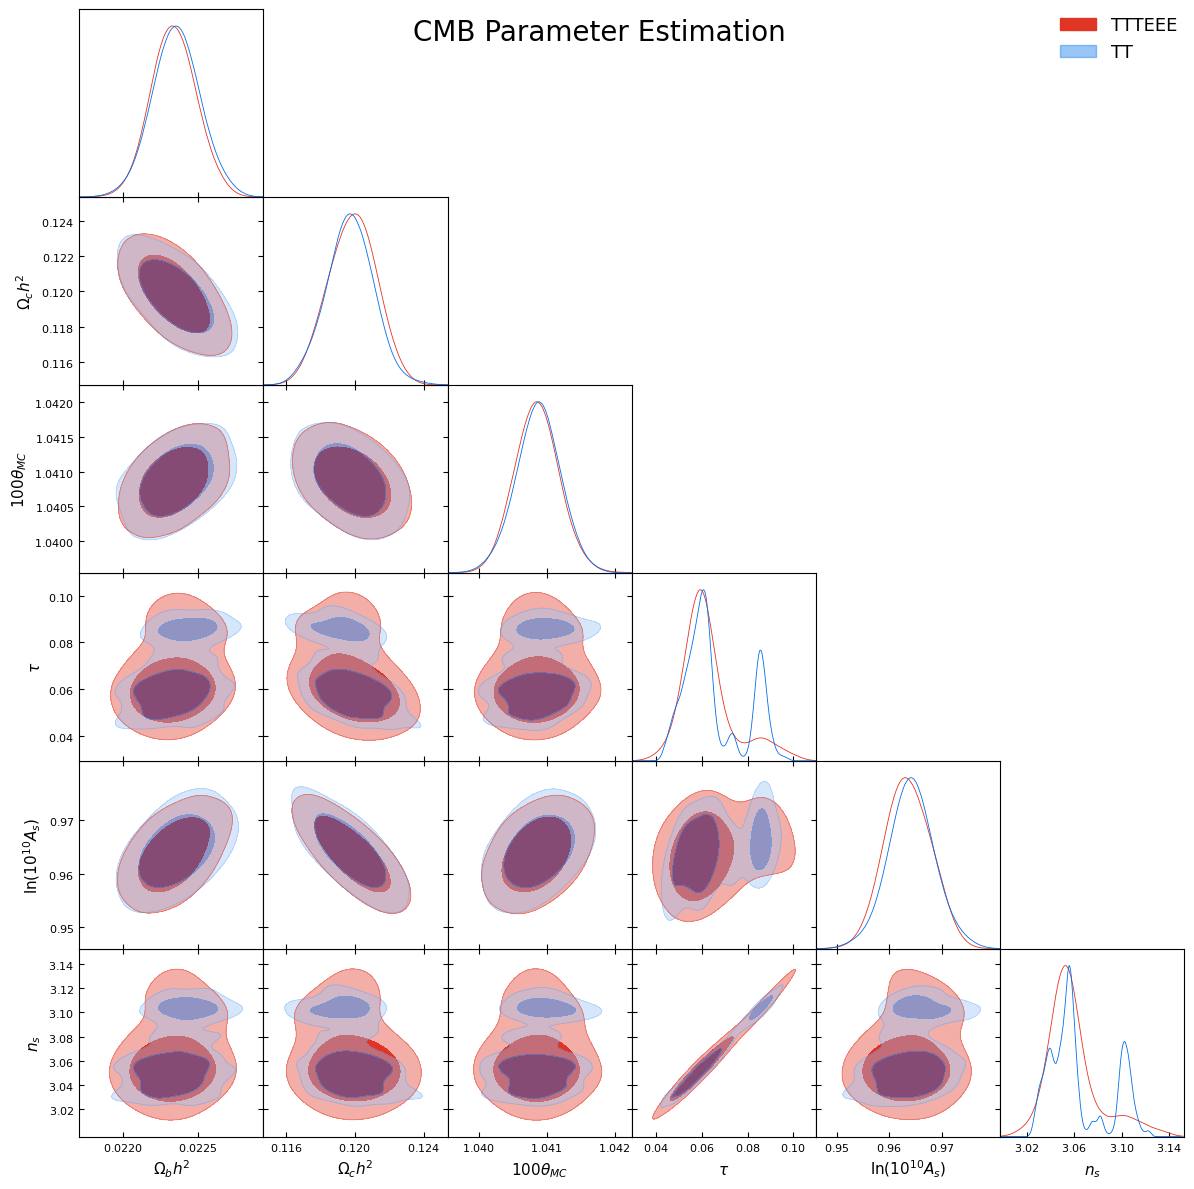

In [227]:
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

# Define the names and labels using LaTeX syntax for the parameters
names = ["\Omega_b h^2", "\Omega_c h^2", "100\theta_{MC}", "\tau", "\ln(10^{10} A_s)", "n_s"]
labels =  [r"\Omega_b h^2", r"\Omega_c h^2", r"100\theta_{MC}", r"\tau", r"\ln(10^{10} A_s)", r"n_s"]

samples = MCSamples(samples=data_reshaped, names=names, labels=labels, label='TTTEEE')
samples2 = MCSamples(samples=data2_reshaped, names=names, labels=labels, label='TT')

# Define the true values from the table
true_values = [0.02229, 0.1197, 1.04087, 0.0536, 3.041, 0.9656]

g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add = 0.4
g.settings.title_limit_fontsize = 14
g.settings.legend_fontsize = 16  # Increase legend font size

g.triangle_plot([samples, samples2], filled=True, legend_labels=['TTTEEE', 'TT'], legend_loc='upper right')

# Add red lines for the true values
# for i, val in enumerate(true_values):
#     g.subplots[i, i].axvline(val, color='red')  # vertical line on the histograms
#     for j in range(i+1, len(true_values)):
#         g.subplots[j, i].axhline(val, color='red')  # horizontal line on the 2D density plots

plt.suptitle('CMB Parameter Estimation', fontsize=20)
plt.show()

Removed no burn in
Removed no burn in


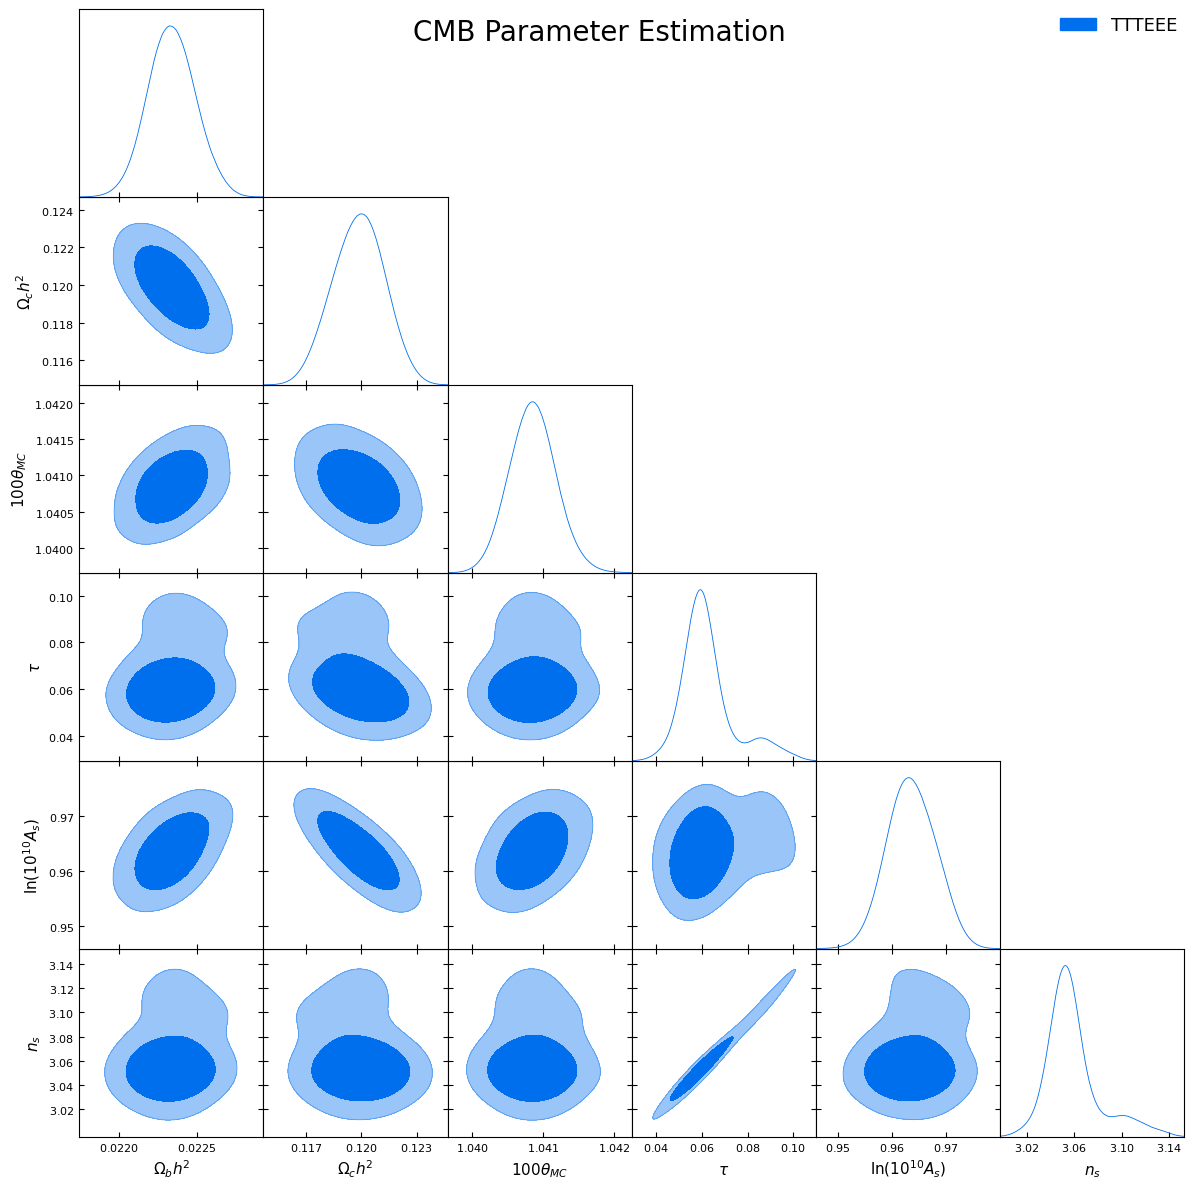

In [228]:
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

# Define the names and labels using LaTeX syntax for the parameters
names = ["\Omega_b h^2", "\Omega_c h^2", "100\theta_{MC}", "\tau", "\ln(10^{10} A_s)", "n_s"]
labels =  [r"\Omega_b h^2", r"\Omega_c h^2", r"100\theta_{MC}", r"\tau", r"\ln(10^{10} A_s)", r"n_s"]

samples = MCSamples(samples=data_reshaped, names=names, labels=labels, label='TTTEEE')
samples2 = MCSamples(samples=data2_reshaped, names=names, labels=labels, label='TT')

# Define the true values from the table
true_values = [0.02229, 0.1197, 1.04087, 0.0536, 3.041, 0.9656]

g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add = 0.4
g.settings.title_limit_fontsize = 14
g.settings.legend_fontsize = 16  # Increase legend font size

g.triangle_plot([samples], filled=True, legend_labels=['TTTEEE', 'TT'], legend_loc='upper right')

# Add red lines for the true values
# for i, val in enumerate(true_values):
#     g.subplots[i, i].axvline(val, color='red')  # vertical line on the histograms
#     for j in range(i+1, len(true_values)):
#         g.subplots[j, i].axhline(val, color='red')  # horizontal line on the 2D density plots

plt.suptitle('CMB Parameter Estimation', fontsize=20)
plt.show()

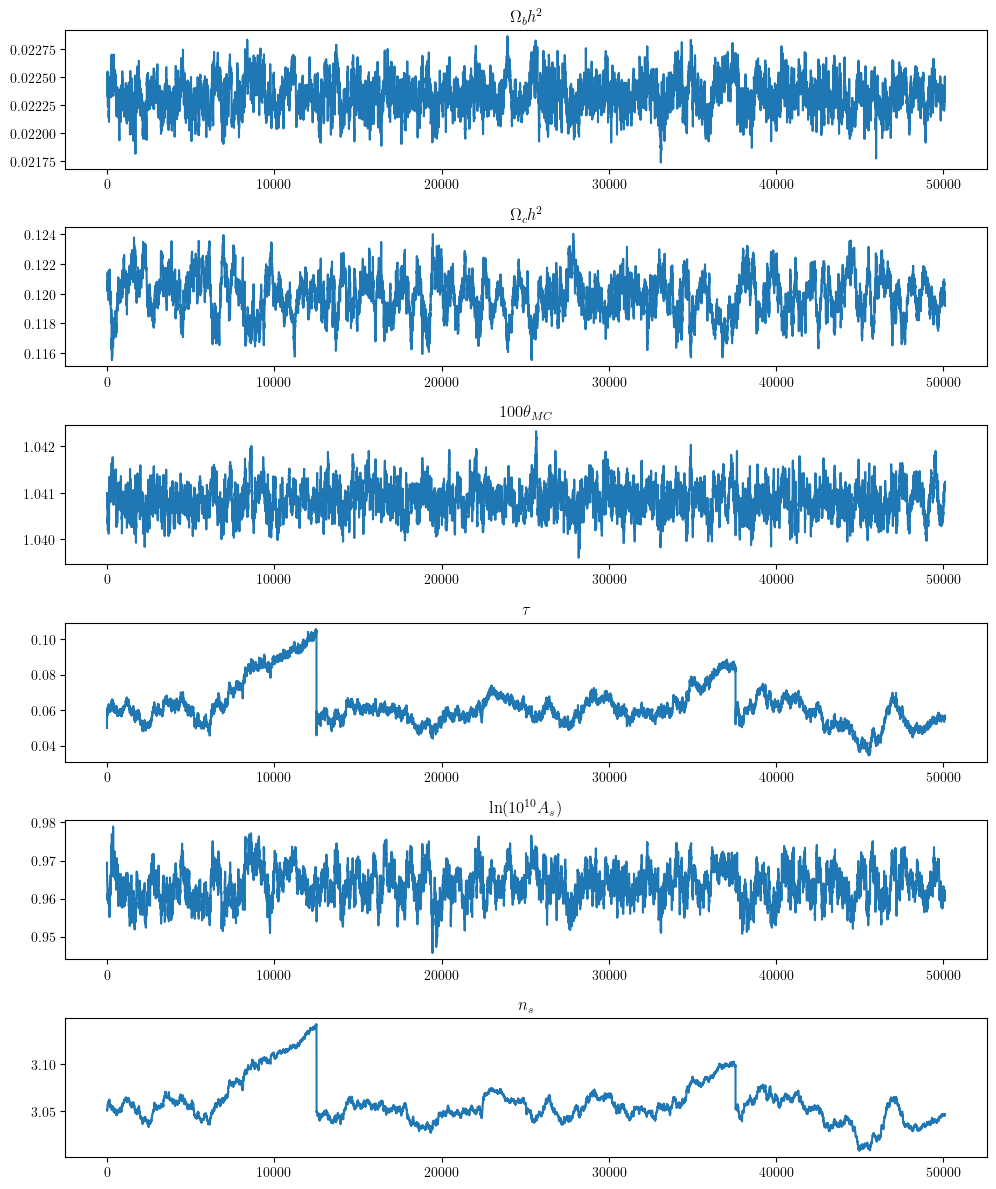

In [232]:
import matplotlib.pyplot as plt

# Enable LaTeX in matplotlib
plt.rcParams['text.usetex'] = True

# Define the number of parameters
num_params = data_reshaped.shape[1]

# Create a new figure
plt.figure(figsize=(10, 2*num_params))

# Loop over all parameters
for i in range(num_params):
    # Create a subplot for each parameter
    plt.subplot(num_params, 1, i+1)
    
    # Plot the trace of the parameter
    plt.plot(data_reshaped[:, i])
    
    # Set the title of the subplot to the parameter's name
    plt.title(r'${}$'.format(labels[i]))  # Wrap the title in LaTeX math mode

# Automatically adjust the subplot layout
plt.tight_layout()

# Display the figure
plt.show()

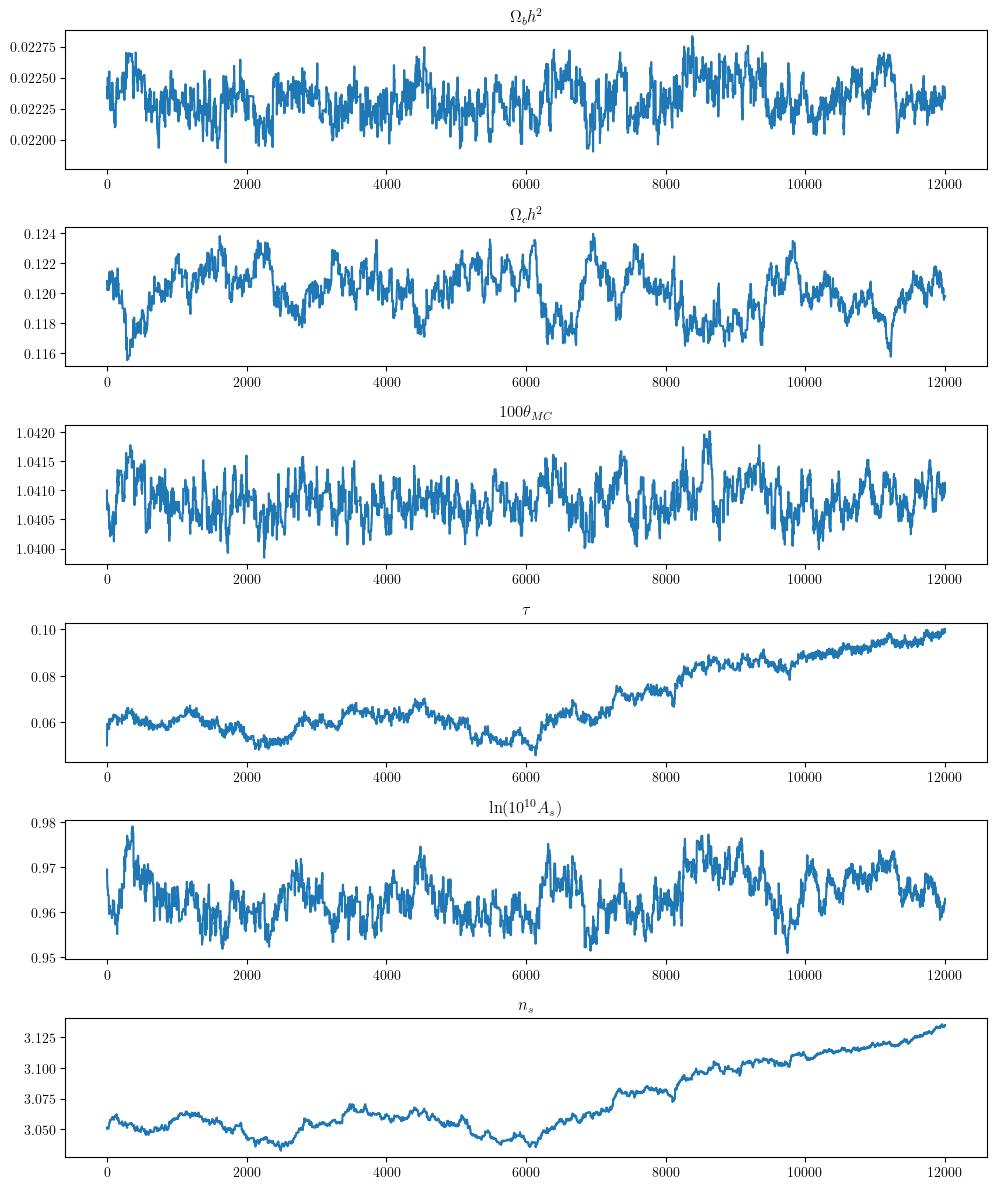

          Parameter   Average                             1 Std Confidence  \
0      \Omega_b h^2  0.022330  (0.02217430398773885, 0.022484701962377875)   
1      \Omega_c h^2  0.120058    (0.11851586457404402, 0.1216004024349061)   
2    100\theta_{MC}  1.040833       (1.040505089514296, 1.041160938962936)   
3              \tau  0.069812   (0.05541859560247067, 0.08420618316550982)   
4  \ln(10^{10} A_s)  0.963412     (0.9584593114348348, 0.9683655907611728)   
5               n_s  3.073657      (3.046151004189229, 3.1011626109130748)   

                              2 Std Confidence  
0  (0.022019105000419332, 0.02263990094969739)  
1   (0.11697359564361297, 0.12314267136533714)  
2       (1.040177164789976, 1.041488863687256)  
3    (0.0410248018209511, 0.09859997694702939)  
4     (0.9535061717716657, 0.9733187304243418)  
5      (3.018645200827306, 3.1286684142749976)  


In [242]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Enable LaTeX in matplotlib
plt.rcParams['text.usetex'] = True

# Define the number of parameters
num_params = data_reshaped.shape[1]

# Create a new figure
plt.figure(figsize=(10, 2*num_params))

# Initialize a DataFrame to store the statistics
stats = pd.DataFrame(columns=['Parameter', 'Average', '1 Std Confidence', '2 Std Confidence'])

# Loop over all parameters
for i in range(num_params):
    # Create a subplot for each parameter
    plt.subplot(num_params, 1, i+1)
    
    # Plot the trace of the parameter for the first 12000 data points
    plt.plot(data_reshaped[:12000, i])
    
    # Set the title of the subplot to the parameter's name
    plt.title(r'${}$'.format(labels[i]))  # Wrap the title in LaTeX math mode

    # Calculate the average and confidence intervals
    avg = np.mean(data_reshaped[:12000, i])
    std = np.std(data_reshaped[:12000, i])
    stats.loc[i] = {
        'Parameter': labels[i],
        'Average': avg,
        '1 Std Confidence': (avg - std, avg + std),
        '2 Std Confidence': (avg - 2*std, avg + 2*std)
    }

# Automatically adjust the subplot layout
plt.tight_layout()

# Display the figure
plt.show()

# Display the statistics
print(stats)

/var/folders/0h/2pkv9xxd45lfrx3mx45bxhxw0000gn/T/ipykernel_51876/161684853.py:26: RuntimeWarning: invalid value encountered in divide
  R = np.sqrt(var_estimate / W)


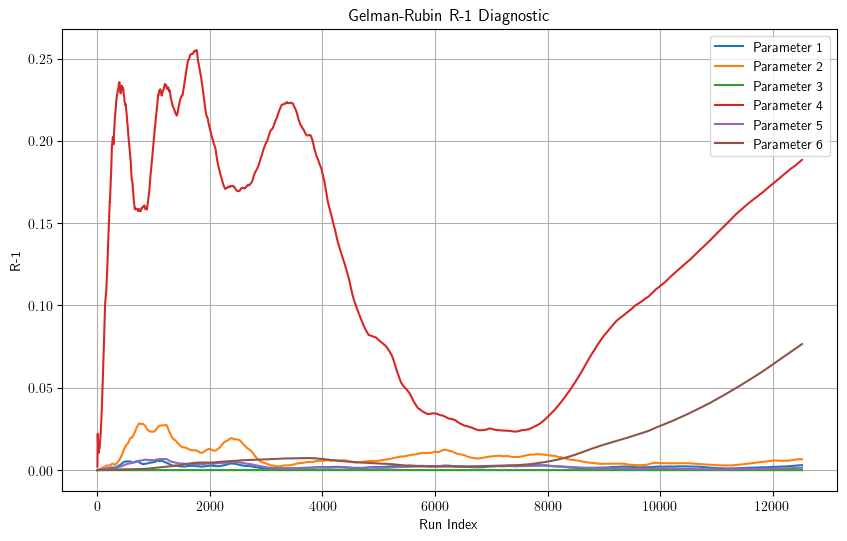

In [240]:
import numpy as np
import matplotlib.pyplot as plt

# Convert states to a numpy array
states = np.array(states)

# Initialize arrays to store the running means and variances
running_means = np.zeros_like(states)
running_vars = np.zeros_like(states)

# Calculate the running means and variances for each chain
for i in range(1, states.shape[1]):
    running_means[:, i, :] = running_means[:, i-1, :] + (states[:, i, :] - running_means[:, i-1, :]) / (i+1)
    running_vars[:, i, :] = ((i-1) * running_vars[:, i-1, :] + (states[:, i, :] - running_means[:, i, :]) * (states[:, i, :] - running_means[:, i-1, :])) / i

# Calculate the between-chain variance
B = states.shape[1] / (states.shape[0] - 1) * np.sum((running_means - np.mean(running_means, axis=0))**2, axis=0)

# Calculate the within-chain variance
W = np.mean(running_vars, axis=0)

# Calculate the variance estimate for the pooled chains
var_estimate = (1 - 1/states.shape[1]) * W + 1/states.shape[1] * B

# Calculate the potential scale reduction factor
R = np.sqrt(var_estimate / W)

# Plot the R-1 diagnostic
plt.figure(figsize=(10, 6))
for i in range(states.shape[2]):
    plt.plot(R[:, i] - 1, label=f'Parameter {i+1}')
plt.title(r'Gelman-Rubin R-1 Diagnostic')
plt.xlabel('Run Index')
plt.ylabel('R-1')
plt.legend()
plt.grid(True)
plt.show()

In [244]:
def process_params_and_calculate_spectra_optimized(array):
    params = {
        'ombh2': array[0],
        'omch2': array[1],
        'cosmomc_theta': array[2] / 100,
        'tau': array[3],
        'ns': array[4],
        'As': np.exp(array[5]) / 1e10,
        'mnu': 0.06,
        'omk': 0,
        'halofit_version': 'mead',
        'lmax': 2800
    }
    return calculate_power_spectra(params)

In [245]:
def calculate_power_spectra(params, lensed=True, accuracy_boost=0.5, l_sample_boost=0.5, l_accuracy_boost=0.5):
    # Update the params dictionary with lower accuracy settings
    params.update({
        'AccuracyBoost': accuracy_boost,
        'lSampleBoost': l_sample_boost,
        'lAccuracyBoost': l_accuracy_boost,
        # You can adjust these values or add other parameters to decrease accuracy further
        'DoLateRadTruncation': True
    })
    
    # Set parameters including the updated accuracy settings
    pars = camb.set_params(**params)
    
    # Get results from CAMB
    results = camb.get_results(pars)
    
    # Get CMB power spectra with specified units
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    
    if lensed:
        cl = powers['total']
    else:
        cl = powers['unlensed_scalar']
    
    # Removing the monopole and dipole terms at l=0 and l=1
    cl_cut = cl[2:]
    cl_tt = cl_cut[:, 0]  # TT spectra
    cl_te = cl_cut[:, 3]  # TE spectra
    cl_ee = cl_cut[:, 1]  # EE spectra
    
    return cl_tt, cl_te, cl_ee

def process_params_and_calculate_spectra(array):
    array = array.copy()
    array[2] /= 100
    array[5] = np.exp(array[5]) / 1e10
    params = {
        'ombh2': array[0],
        'omch2': array[1],
        'cosmomc_theta': array[2],
        'tau': array[3],
        'ns': array[4],
        'As': array[5],
        'mnu': 0.06,
        'omk': 0,
        'halofit_version': 'mead',
        'lmax': 2800
    }
    return calculate_power_spectra(params)

In [249]:
print(stats['Average'].values)

[0.0223295  0.12005813 1.04083301 0.06981239 0.96341245 3.07365681]


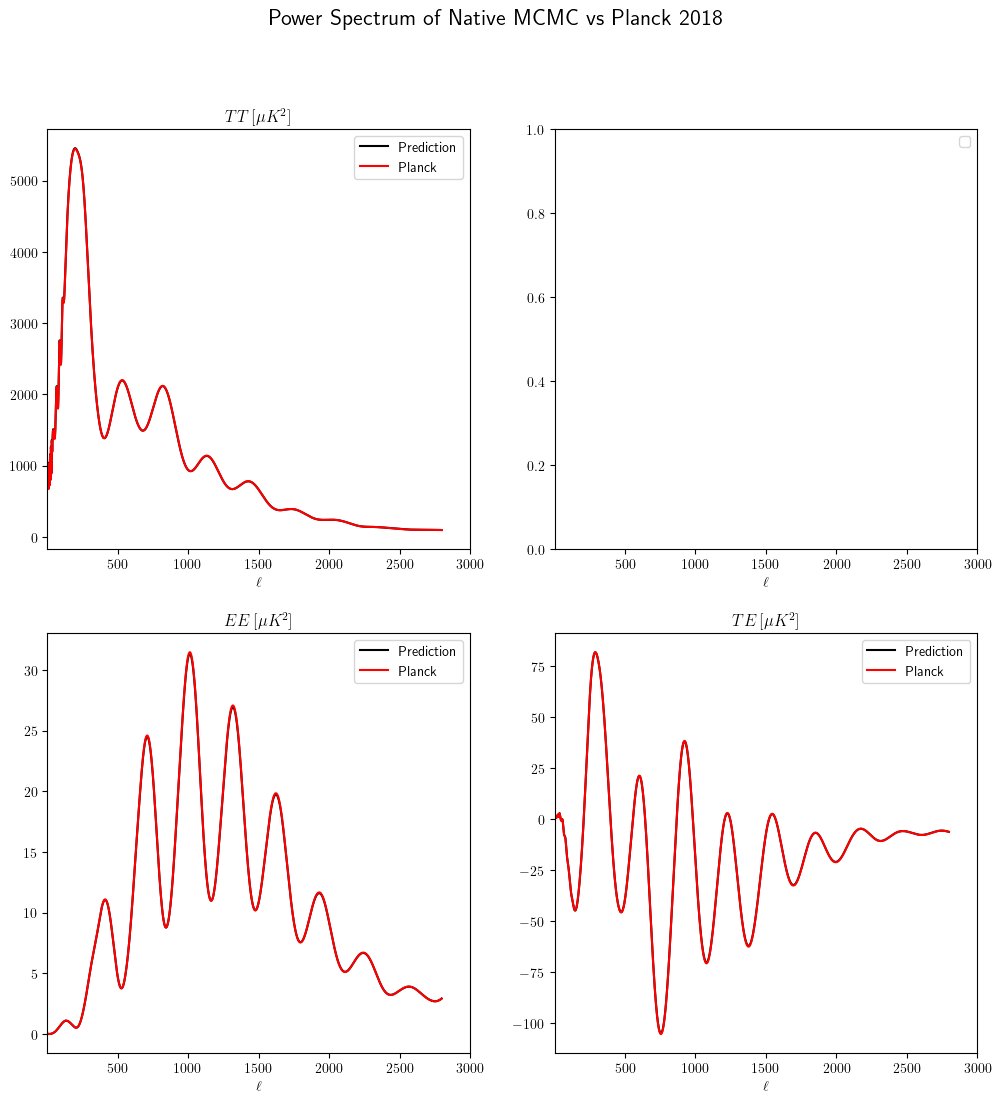

In [252]:
# Calculate the power spectra using the mean values
mean_cl_tt, mean_cl_te, mean_cl_ee = process_params_and_calculate_spectra(stats['Average'].values)

# Define the optimal parameters
optimal_params = np.array([0.02229, 0.1197, 1.04087, 0.0536, 0.9656,3.041])

# Calculate the power spectra using the optimal parameters
optimal_cl_tt, optimal_cl_te, optimal_cl_ee = process_params_and_calculate_spectra(optimal_params)

# Plot the power spectra calculated from the mean values
ls = np.arange(mean_cl_tt.shape[0])
fig, ax = plt.subplots(2,2, figsize = (12,12))
fig.suptitle('Power Spectrum of Native MCMC vs Planck 2018', fontsize=16)
ax[0,0].plot(ls, mean_cl_tt, color='k', label='Prediction')
ax[0,0].plot(ls, optimal_cl_tt, color='r', label='Planck')
ax[0,0].set_title(r'$TT\, [\mu K^2]$')
ax[1,0].plot(ls, mean_cl_ee, color='k', label='Prediction')
ax[1,0].plot(ls, optimal_cl_ee, color='r', label='Planck')
ax[1,0].set_title(r'$EE\, [\mu K^2]$')
ax[1,1].plot(ls, mean_cl_te, color='k', label='Prediction')
ax[1,1].plot(ls, optimal_cl_te, color='r', label='Planck')
ax[1,1].set_title(r'$TE\, [\mu K^2]$')

for ax in ax.reshape(-1): 
    ax.set_xlim([2,3000])
    ax.set_xlabel(r'$\ell$')
    ax.legend()

plt.show()